<font color="orange">
Для корректной работы всех полей необходимо перед запуском среды выполнений загрузить на свой гугл диск файл по ссылке
<font color="orange">
https://drive.google.com/file/d/1n30YG1UdIf6Gdxc73t8jNzexB7zIHKMu/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### <font color="cornflowerblue">Фильтрация и очистка данных

<font color="cornflowerblue">Для начала загружаем файл для работы (для этого было нужно первоначально скачать его на диск)

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
#Ниже вписываем свой путь до файла
data_path = "/content/drive/My Drive/"
#вписываем своё название файла
data_set = pd.read_csv(data_path + 'Dataset.csv')
data_set

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,data,curs (rub/USD)
0,8/26/2022,59.7699
1,8/25/2022,59.9974
2,8/24/2022,59.8963
3,8/23/2022,59.7419
4,8/22/2022,NaN
...,...,...
598,1/5/2021,NaN
599,1/4/2021,NaN
600,1/3/2021,NaN
601,1/2/2021,NaN


<font color="cornflowerblue"> Выводим шапку нашей таблицы, чтобы убедиться, что всё работает корректно

In [ ]:
data_set.head()

,data,curs (rub/USD)
0,8/26/2022,59.7699
1,8/25/2022,59.9974
2,8/24/2022,59.8963
3,8/23/2022,59.7419
4,8/22/2022,NaN


<font color="cornflowerblue"> Заменяем все пустые строки на 0

In [ ]:
data_set.isnull().sum()
data_set = data_set.fillna(0) #меняем все NaN на 0
data_set.head()

,data,curs (rub/USD)
0,8/26/2022,59.7699
1,8/25/2022,59.9974
2,8/24/2022,59.8963
3,8/23/2022,59.7419
4,8/22/2022,0.0000


<font color="cornflowerblue"> Заполняем нулевые строки средним значением ближайших к ним ненулевых строк

In [ ]:
flag = 0
k = 0
start = 0
finish = 0
difference = 0
quantity = 1
for i in range(len(data_set['curs (rub/USD)']) - 1):
  if flag == 0: #если ищем 0
    if data_set['curs (rub/USD)'][i + 1] == 0: #нашли 0
      k = i + 1
      start = data_set['curs (rub/USD)'][i] #фиксируем первое значение
      while True: #ищем первый НЕ 0
        if data_set['curs (rub/USD)'][k] != 0:
          finish = data_set['curs (rub/USD)'][k] #фиксируем конечное значение
          difference = abs(finish - start) #находим разницу для градиента значений
          flag = 1 #дальше будем менять значения
          quantity = k - i
          break
        else:
          k += 1
    continue
  if flag == 1:
    if i == k: #дошли до конца "нулей"
      flag = 0 #ищем следующие нули
      continue
    else:
      if start < finish: #проверяем, что делать с разницей: прибалять или отнимать
        data_set['curs (rub/USD)'][i] = data_set['curs (rub/USD)'][i - 1] + difference/quantity
      else:
        data_set['curs (rub/USD)'][i] = data_set['curs (rub/USD)'][i - 1] - difference/quantity

data_set.head() #проверяем, поменялись ли значения

<ipython-input-999-0f82e211633c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['curs (rub/USD)'][i] = data_set['curs (rub/USD)'][i - 1] - difference/quantity
<ipython-input-999-0f82e211633c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['curs (rub/USD)'][i] = data_set['curs (rub/USD)'][i - 1] + difference/quantity


,data,curs (rub/USD)
0,8/26/2022,59.769900
1,8/25/2022,59.997400
2,8/24/2022,59.896300
3,8/23/2022,59.741900
4,8/22/2022,59.538633


<font color="cornflowerblue"> Возьмём интервал в
полтора года с 1 января 2021 года по 1 июля 2022 года (18 месяцев или 547 дней)

<font color="cornflowerblue"> Нахождение среднего значения

In [ ]:
summa = 0
quantity = 0

for i in data_set['curs (rub/USD)']:
  summa += i
  quantity += 1
average_value = summa / quantity
print("Среднее значение:", average_value)

Среднее значение: 73.13832686567152


<font color="cornflowerblue"> Строим график курса доллара, чтобы визуально оценить его изменения во времени

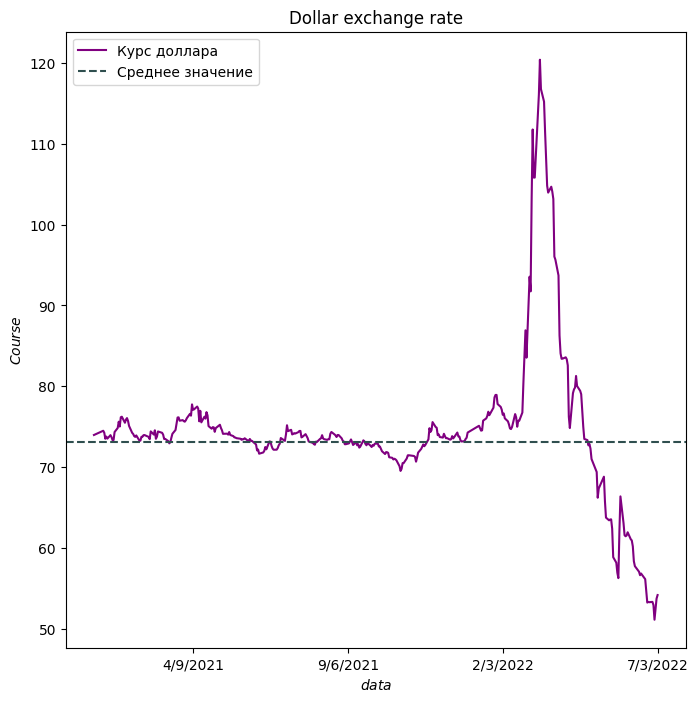

In [ ]:
x = data_set["data"][54:-2]
y = data_set['curs (rub/USD)'][54:-2]
plt.figure(figsize=(8, 8))
plt.ylabel(r'$Course$')
plt.title("Dollar exchange rate")
plt.xlabel(r'$data$')
plt.plot(x, y, color = 'purple', label = "Курс доллара")
plt.axhline(y = average_value, color = 'darkslategray', linestyle = '--', label = 'Среднее значение')
plt.xticks(range(0, len(x), 150)) #ставим ограничение на показ дат для лучшего понимая графика
plt.gca().invert_xaxis() #разворачиваем график по оси Х, чтобы даты шли с начала промежутка
plt.legend()
plt.show()

<font color="cornflowerblue"> Нахождение стандартного (среднеквадратического) отклонения

In [ ]:
sum_of_deviations= 0
for i in data_set['curs (rub/USD)']:
  sum_of_deviations+= abs(average_value - i)**2
standard_deviation= (sum_of_deviations/ quantity) ** 0.5
print("Стандартное (среднеквадратическое) отклонение:", standard_deviation)

Стандартное (среднеквадратическое) отклонение: 9.863867924598152


<font color="cornflowerblue"> Нахождение медианы значений

In [ ]:
dollar_rates = []
for i in data_set['curs (rub/USD)']:
  dollar_rates .append(i)
dollar_rates .sort()
print("Медиана:", dollar_rates [len(dollar_rates ) // 2 + 1])

Медиана: 73.587


<font color="cornflowerblue">  Найдём коэффициент асимметрии

<font color="cornflowerblue"> Для нахождения коэффициента ассиметрии воспользуемся следующей формулой:


$A_s = \frac{\mu_3}{\sigma^3}$


<font color="cornflowerblue"> где


$\mu_3 = E[(X-EX)^3]$


$\sigma$ - стандартное отклонение


$A_s$ - коэффициент ассиметрии


In [ ]:
for i in data_set['curs (rub/USD)']:
  summa += (i - average_value)**3
mu = summa / quantity

A = mu/(standard_deviation)**3
print("Коэффициент асимметрии:", A)

Коэффициент асимметрии: 1.6058386756463818


<font color="cornflowerblue">  Найдём коэффициент эксцесса

<font color="cornflowerblue"> Для нахождения коэффициента эксцесса воспользуемся следующей формулой:


$\gamma_2 = \frac{\mu_4}{\sigma^4} - 3$


<font color="cornflowerblue"> где


$\mu_4 = E[(X-EX)^4]$


$\sigma$ - стандартное отклонение


$\gamma_2$ - коэффициент ассиметрии


In [ ]:
for i in data_set['curs (rub/USD)']:
  summa += (i - average_value)**4
mu = summa / quantity

A = mu/(standard_deviation)**4 - 3
print("Коэффициент эксцесса:", A)

Коэффициент эксцесса: 6.06143772720416


# <font color="orange"> Расчёт **VAR**


<font color="cornflowerblue"> **Уровень доверия - 95%**

<font color="cornflowerblue"> Рассчитаем ежедневную доходность (или изменение) для курса доллара

In [ ]:
profits= []
for i in range(1, len(data_set['curs (rub/USD)'])):
  profitability= (data_set['curs (rub/USD)'][i] - data_set['curs (rub/USD)'][i - 1]) / data_set['curs (rub/USD)'][i - 1]
  profits.append(profitability)
profits[:20] #проверим, что всё нормально

[0.0038062636879097867,
 -0.0016850730198308995,
 -0.002577788611316483,
 -0.0034024138279275394,
 -0.003414029770026032,
 -0.0034257252981780627,
 0.013950121845833304,
 0.013312874226529036,
 0.011019632887390697,
 -0.0008140047896042515,
 -0.0025819542363004497,
 -0.0025886379811020043,
 -0.0025953564193033937,
 -0.00453864001720866,
 -0.002782776805464621,
 -0.0012042174075581327,
 -0.0010764904424209727,
 0.00029400516830136196,
 0.0002939187546684287,
 0.00029383239181774443]

In [ ]:
profits= profits[:547]

<font color="cornflowerblue"> Рассчитаем среднюю дневную доходность для курса доллара (ожидаемый доход)

In [ ]:
av_daily_profit = sum(profits) / len(profits)
print('Средняя дневная доходность:', av_daily_profit)

Средняя дневная доходность: 0.0004950511928295476


<font color="cornflowerblue"> График ежедневной доходности

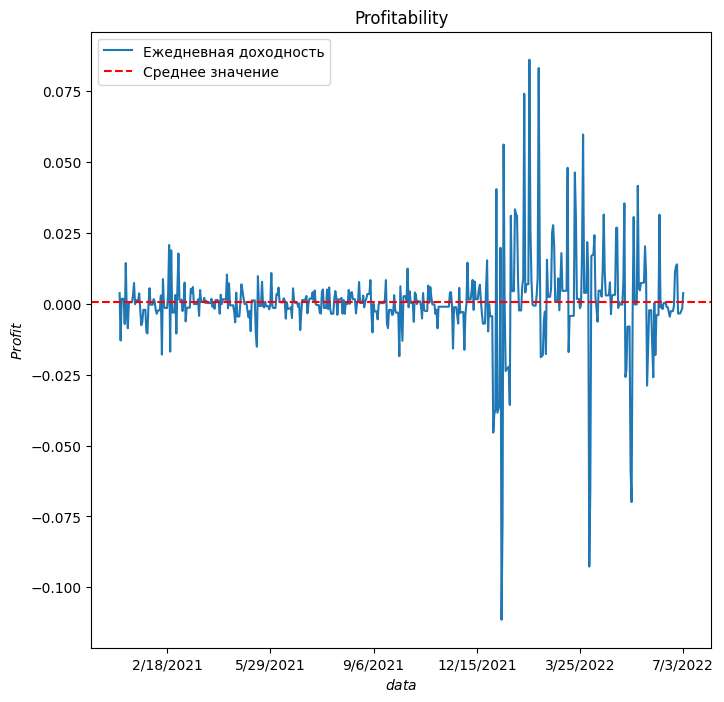

In [ ]:
x = data_set["data"][54:-2]
y = profits
plt.figure(figsize=(8, 8))
plt.ylabel(r'$Profit$')
plt.title("Profitability")
plt.xlabel(r'$data$')
plt.plot(x, y, label = 'Ежедневная доходность')
plt.axhline(y = av_daily_profit, color = 'red', linestyle = '--', label = 'Среднее значение')
plt.xticks(range(0, len(x), 100)) #ставим ограничение на показ дат для лучшего понимая графика
plt.gca().invert_xaxis() #разворачиваем график по оси Х, чтобы даты шли с начала промежутка
plt.legend()
plt.show()

<font color="cornflowerblue"> Найдём стандартное отклонение для курса доллара (меру риска)

In [ ]:
sum_of_prof_dev= 0
for i in profits:
  sum_of_prof_dev+= (av_daily_profit - i)**2
standard_deviation= (sum_of_prof_dev/ len(profits)) ** 0.5
print("Стандартное (среднеквадратическое) отклонение:", sum_of_prof_dev)

Стандартное (среднеквадратическое) отклонение: 0.11996580087268802


<font color="cornflowerblue"> Так как уровень доверия 95%, то перцентиль - 5%

In [ ]:
percentile = 0.05

<font color="cornflowerblue"> Непосредственно вычисление VAR

In [ ]:
VAR = np.percentile(profits, percentile * 100)
print(f"VAR: {VAR:.2%}")

VAR: -1.75%


<font color="cornflowerblue"> Получаем, что VAR для выбранного уровня доверия составит ~ -1.75%

<font color="cornflowerblue"> Пусть у нас есть баланс в 1000 руб. Тогда с вероятностью 95% наши потери будут не больше,чем 17.5 руб.

# <font color="orange"> **VAR** = 17.5 руб. при балансе в 1000 руб. и уровнем доверия 95%

<font color="cornflowerblue"> Построим график для VAR

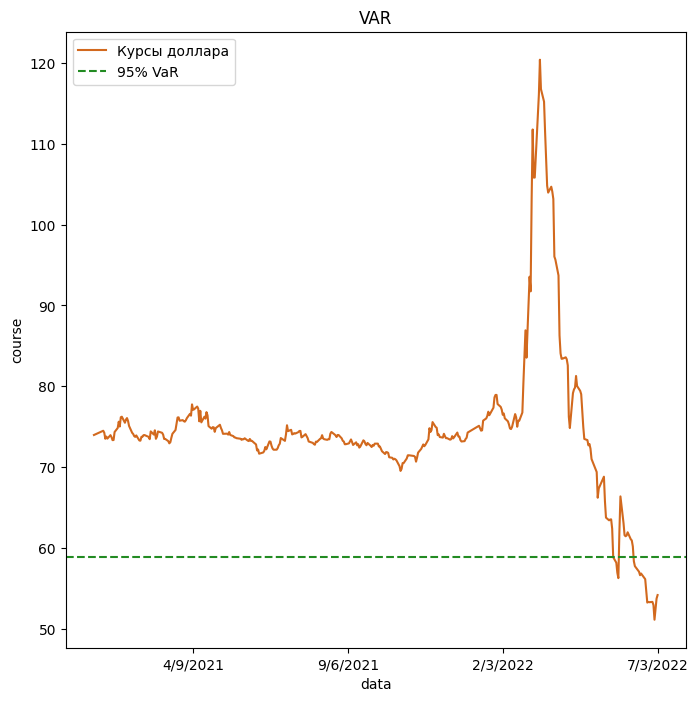

In [ ]:
plt.figure(figsize=(8,8))
x = data_set["data"][54:-2]
y = data_set['curs (rub/USD)'][54:-2]
plt.plot(x, y, color = 'chocolate', label='Курсы доллара')
plt.axhline(y=data_set['curs (rub/USD)'][1] * (1 + VAR), color='forestgreen', linestyle='--', label='95% VaR')
plt.xlabel('data')
plt.ylabel('course')
plt.title('VAR')
plt.xticks(range(0, len(x), 150)) #ставим ограничение на показ дат для лучшего понимая графика
plt.gca().invert_xaxis() #разворачиваем график по оси Х, чтобы даты шли с начала промежутка
plt.legend()
plt.show()